In [1]:
# standard python imports
import csv
from collections import defaultdict
from itertools import combinations

## standard ds libaries
import pandas as pd #pandas
import numpy as np #numpy
import pingouin as ping #one-liner anovas

### ds viz libraries
import seaborn as sns #data viz
import matplotlib.pyplot as plt #data viz
from matplotlib.ticker import FormatStrFormatter #viz formatting

### sql for python
import duckdb

/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
df_list=pd.read_csv(r"/Users/ryanha/Documents/3. Data Projects/00. Job Interviews/Sony Pictures People Analytics/SonyPictures_DS_Airbnb_dataset/listings.csv")

In [4]:
df_cal=pd.read_csv(r"/Users/ryanha/Documents/3. Data Projects/00. Job Interviews/Sony Pictures People Analytics/SonyPictures_DS_Airbnb_dataset/calendar.csv")

## Data Exploration

In [5]:
df_list

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_identity_verified,...,beds,amenities,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,12651,49735,Laurel,10/29/09,within an hour,100%,98%,t,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
1,39342,127367,Annette,5/18/10,within a few hours,100%,40%,f,"['email', 'phone', 'reviews', 'offline_governm...",t,...,2.0,"[""Refrigerator"", ""Hot water"", ""Dishes and silv...",30,365,t,365,2,90.0,f,0.02
2,40560,174725,Megan,7/20/10,NaN,NaN,48%,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,1.0,"[""Hot water"", ""Hangers"", ""Wifi"", ""Host greets ...",1,100,t,365,133,98.0,f,1.06
3,44504,195645,Maggie,8/8/10,within an hour,100%,100%,t,"['email', 'phone', 'facebook', 'reviews', 'off...",t,...,1.0,"[""Iron"", ""Dishes and silverware"", ""Shampoo"", ""...",3,28,t,179,150,97.0,f,1.20
4,45287,200479,Diane And Mike,8/13/10,within an hour,100%,94%,t,"['email', 'phone', 'reviews', 'kba']",t,...,1.0,"[""Refrigerator"", ""Hot water"", ""Lockbox"", ""Dish...",3,1125,t,177,257,98.0,f,2.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,47274637,226555948,Gi'Angelo,11/19/18,within an hour,100%,95%,t,"['email', 'phone', 'reviews', 'offline_governm...",t,...,1.0,"[""Iron"", ""Dishes and silverware"", ""Shampoo"", ""...",30,120,t,178,0,NaN,f,NaN
2689,47274772,226555948,Gi'Angelo,11/19/18,within an hour,100%,95%,t,"['email', 'phone', 'reviews', 'offline_governm...",t,...,1.0,"[""Body wash body soap"", ""Refrigerator"", ""Hot w...",30,120,t,150,0,NaN,f,NaN
2690,47291853,368763236,Rolf & Noah As Manager,9/22/20,within an hour,100%,93%,f,"['phone', 'offline_government_id', 'selfie', '...",t,...,2.0,"[""Smoke alarm"", ""TV"", ""Heating"", ""Iron"", ""Hot ...",5,10,t,302,0,NaN,t,NaN
2691,47295017,41574587,Enrique And Vienna Of Q Management,8/15/15,within an hour,86%,98%,f,"['email', 'phone', 'reviews', 'kba']",f,...,2.0,"[""Mini fridge"", ""Hair dryer"", ""Hangers"", ""Smok...",1,29,t,347,0,NaN,t,NaN


In [6]:
df_cal

,listing_id,date,available,price
0,12651,2021-01-04,f,197
1,12651,2021-01-05,f,197
2,12651,2021-01-06,f,197
3,12651,2021-01-07,f,197
4,12651,2021-01-08,f,197
...,...,...,...,...
982945,617211,2021-12-30,t,148
982946,617211,2021-12-31,t,148
982947,617211,2022-01-01,t,148
982948,617211,2022-01-02,t,148


## Data Anamolies
Any anamolies in the data frames that require cleaning or transformation?

### exploring "listings.csv"

In [7]:
df_list.isnull()

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_identity_verified,...,beds,amenities,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2691,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [8]:
df_list.isnull().sum()

id                          0
host_id                     0
host_name                   0
host_since                  0
host_response_time        561
host_response_rate        561
host_acceptance_rate      306
host_is_superhost           0
host_verifications          0
host_identity_verified      0
neighbourhood               0
room_type                   0
accommodates                0
bedrooms                  164
beds                       34
amenities                   0
minimum_nights              0
maximum_nights              0
has_availability            0
availability_365            0
number_of_reviews           0
review_scores_rating      414
instant_bookable            0
reviews_per_month         400
dtype: int64

In [9]:
df_list.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2688    False
2689    False
2690    False
2691    False
2692    False
Length: 2693, dtype: bool

In [10]:
df_list['beds'].describe()

count    2659.000000
mean        2.219631
std         2.031332
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        27.000000
Name: beds, dtype: float64

In [11]:
df_list['maximum_nights'].describe()

count     2693.000000
mean       631.439658
std        545.467062
min          1.000000
25%         31.000000
50%       1124.000000
75%       1125.000000
max      10000.000000
Name: maximum_nights, dtype: float64

### "listings.csv" summary
- 2693 rows
- No Duplicates
- Null values, but none looking to affect core analysis

### exploring "calendar.csv"

In [12]:
df_cal.isnull()

,listing_id,date,available,price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
982945,False,False,False,False
982946,False,False,False,False
982947,False,False,False,False
982948,False,False,False,False


In [13]:
df_cal.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [14]:
df_cal.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
982945    False
982946    False
982947    False
982948    False
982949    False
Length: 982950, dtype: bool

In [15]:
df_cal['price'].describe()

count    982950.000000
mean        202.158518
std         325.455831
min           0.000000
25%          79.000000
50%         129.000000
75%         229.000000
max       10000.000000
Name: price, dtype: float64

In [16]:
df_cal['date'].describe()

count         982950
unique           372
top       2021-07-09
freq            2693
Name: date, dtype: object

In [17]:
df_cal['available'].describe()

count     982950
unique         2
top            t
freq      535975
Name: available, dtype: object

In [18]:
df_cal['listing_id'].describe()

count    9.829500e+05
mean     2.709136e+07
std      1.378660e+07
min      1.265100e+04
25%      1.629927e+07
50%      2.874998e+07
75%      3.946912e+07
max      4.729992e+07
Name: listing_id, dtype: float64

### "listings.csv" summary
- 982950 rows
- No Duplicates
- No Null values --  Perfect as this will be the main data set used for analysis, for purposes of the assessment.

# Data Processing -  Finding Means

In [19]:
row_avg = df_cal.mean(axis=1)

/var/folders/v_/rfwdj10x2vd28j8lm45018bm0000gn/T/ipykernel_14996/4261252991.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_avg = df_cal.mean(axis=1)


In [20]:
row_avg

0           6424.0
1           6424.0
2           6424.0
3           6424.0
4           6424.0
            ...   
982945    308679.5
982946    308679.5
982947    308679.5
982948    308679.5
982949    308679.5
Length: 982950, dtype: float64

In [21]:
listings_mean = df_cal.groupby('listing_id').mean()['price']

In [22]:
listings_mean

listing_id
12651       211.073973
39342       120.000000
40560       110.000000
44504       210.000000
45287       145.000000
               ...    
47274637     69.000000
47274772     69.000000
47291853    210.000000
47295017     85.000000
47299925     68.605479
Name: price, Length: 2693, dtype: float64

## Price Averages -  (By Calendar Day)

In [23]:
price_avg = df_cal.groupby('date')['price'].mean().reset_index().rename(columns={'date':'calendar_day', 
                                                                                 'price':'avg_price'})

'''
x=Avg_Prices['Month_Year']
y=Avg_Prices['avg_price']

#availibility.plot()
plt.figure(figsize=(15,8))
plt.title("Avg Price per Month")
sns.barplot(data=Avg_Prices,x='Month_Year',y='avg_price',color='b',palette=None)
Avg_Prices.sort_values(by='avg_price',ascending=False)
'''

'\nx=Avg_Prices[\'Month_Year\']\ny=Avg_Prices[\'avg_price\']\n\n#availibility.plot()\nplt.figure(figsize=(15,8))\nplt.title("Avg Price per Month")\nsns.barplot(data=Avg_Prices,x=\'Month_Year\',y=\'avg_price\',color=\'b\',palette=None)\nAvg_Prices.sort_values(by=\'avg_price\',ascending=False)\n'

In [24]:
price_avg

,calendar_day,avg_price
0,2020-12-29,180.875000
1,2020-12-30,147.900990
2,2020-12-31,183.470588
3,2021-01-01,196.646388
4,2021-01-02,193.721649
...,...,...
367,2021-12-31,212.268354
368,2022-01-01,212.377480
369,2022-01-02,206.091810
370,2022-01-03,209.726408


In [25]:
price_avg.describe()

,avg_price
count,372.000000
mean,201.833064
std,8.964060
min,147.900990
25%,195.088284
50%,204.584107
75%,207.562941
max,218.887857


# Data Visualizations

,calendar_day,avg_price
221,2021-08-07,218.887857
220,2021-08-06,218.616784
206,2021-07-23,216.544003
186,2021-07-03,215.987375
207,2021-07-24,215.362050
...,...,...
6,2021-01-04,182.427444
5,2021-01-03,181.111732
0,2020-12-29,180.875000
371,2022-01-04,180.342105


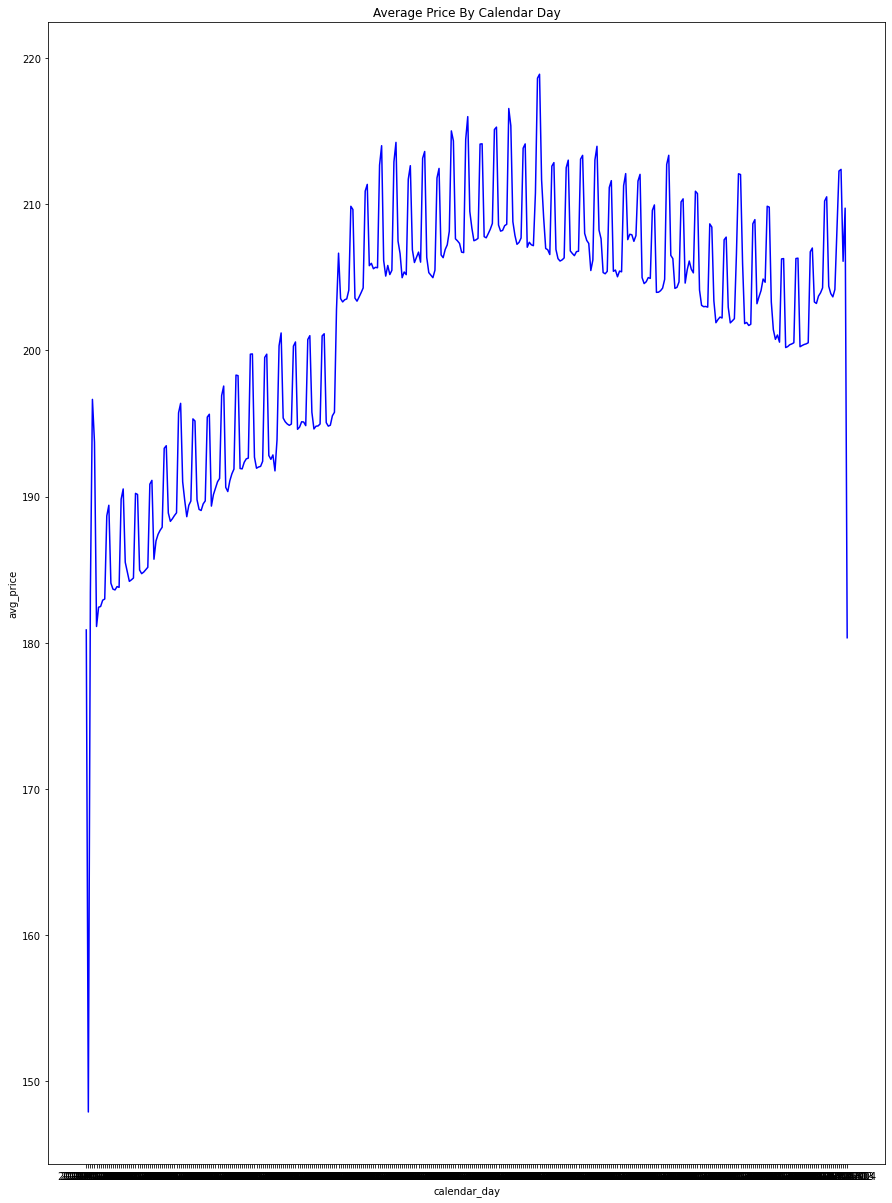

In [26]:
# average price plot -  line plot
plt.figure(figsize=(15,21))
plt.title("Average Price By Calendar Day")
sns.lineplot(data=price_avg,x='calendar_day',y='avg_price',color='b',palette=None)
price_avg.sort_values(by='avg_price',ascending=False)

In [27]:
price_avg.sort_values(by='calendar_day',ascending=True)

,calendar_day,avg_price
0,2020-12-29,180.875000
1,2020-12-30,147.900990
2,2020-12-31,183.470588
3,2021-01-01,196.646388
4,2021-01-02,193.721649
...,...,...
367,2021-12-31,212.268354
368,2022-01-01,212.377480
369,2022-01-02,206.091810
370,2022-01-03,209.726408


<AxesSubplot:title={'center':'Average Price By Calendar Day'}, xlabel='calendar_day', ylabel='avg_price'>

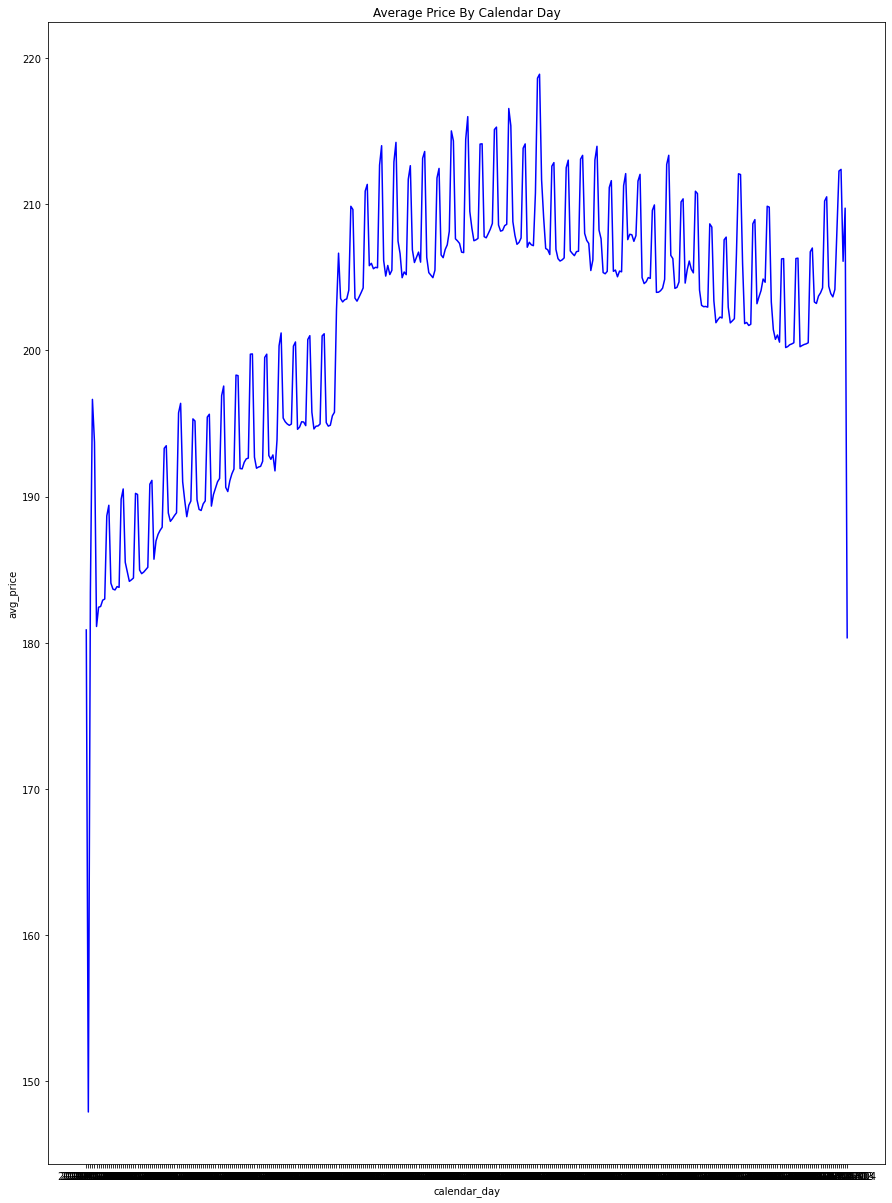

In [28]:
plt.figure(figsize=(15,21))
plt.title("Average Price By Calendar Day")
sns.lineplot(data=price_avg,x='calendar_day',y='avg_price',color='b',palette=None)

<AxesSubplot:xlabel='calendar_day', ylabel='avg_price'>

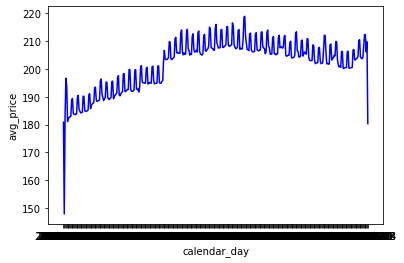

In [29]:
sns.lineplot(data=price_avg,x='calendar_day',y='avg_price',color='b',palette=None)

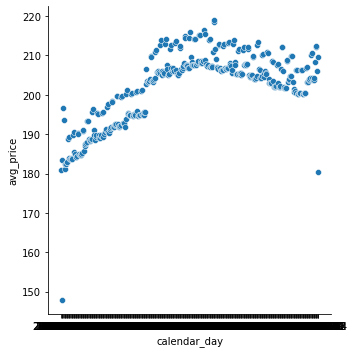

In [30]:

sns.relplot(data=price_avg,x='calendar_day',y='avg_price')

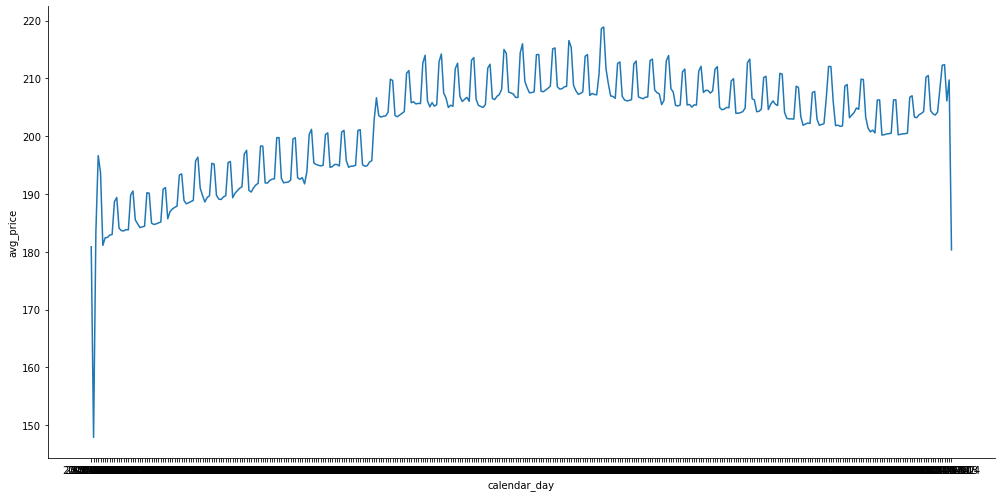

In [31]:

sns.relplot(data=price_avg,x='calendar_day',y='avg_price' , kind='line', height=7, aspect=2)

## Additional Data Processing -  Splitting & Concat Dates...
<b>For visual cleanliness -</b>  Separating Year from the Month-Day Date

In [35]:
price_avg2 = price_avg

In [36]:
price_avg2

,calendar_day,avg_price
0,2020-12-29,180.875000
1,2020-12-30,147.900990
2,2020-12-31,183.470588
3,2021-01-01,196.646388
4,2021-01-02,193.721649
...,...,...
367,2021-12-31,212.268354
368,2022-01-01,212.377480
369,2022-01-02,206.091810
370,2022-01-03,209.726408


In [45]:
price_avg2['year'] = pd.DatetimeIndex(price_avg2['calendar_day']).year
price_avg2['month'] = pd.DatetimeIndex(price_avg2['calendar_day']).month
price_avg2['day'] = pd.DatetimeIndex(price_avg2['calendar_day']).day

In [46]:
price_avg2

,calendar_day,avg_price,year,month,day
0,2020-12-29,180.875000,2020,12,29
1,2020-12-30,147.900990,2020,12,30
2,2020-12-31,183.470588,2020,12,31
3,2021-01-01,196.646388,2021,1,1
4,2021-01-02,193.721649,2021,1,2
...,...,...,...,...,...
367,2021-12-31,212.268354,2021,12,31
368,2022-01-01,212.377480,2022,1,1
369,2022-01-02,206.091810,2022,1,2
370,2022-01-03,209.726408,2022,1,3


In [50]:
cols=["month","day"]
price_avg2['month_day'] = price_avg2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [51]:
price_avg2

,calendar_day,avg_price,year,month,day,month_day
0,2020-12-29,180.875000,2020,12,29,12-29
1,2020-12-30,147.900990,2020,12,30,12-30
2,2020-12-31,183.470588,2020,12,31,12-31
3,2021-01-01,196.646388,2021,1,1,1-1
4,2021-01-02,193.721649,2021,1,2,1-2
...,...,...,...,...,...,...
367,2021-12-31,212.268354,2021,12,31,12-31
368,2022-01-01,212.377480,2022,1,1,1-1
369,2022-01-02,206.091810,2022,1,2,1-2
370,2022-01-03,209.726408,2022,1,3,1-3


In [49]:
price_avg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calendar_day  372 non-null    object 
 1   avg_price     372 non-null    float64
 2   year          372 non-null    int64  
 3   month         372 non-null    int64  
 4   day           372 non-null    int64  
 5   month_day     372 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 17.6+ KB


## More X-Axis Labels...

In [55]:
#Convert to Quarters
price_avg2['quarter'] = pd.PeriodIndex(price_avg2['calendar_day'], freq='Q')
price_avg2['quarterc'] = price_avg2['quarter'].astype('string')

In [56]:
price_avg2

,calendar_day,avg_price,year,month,day,month_day,quarter,quarterc
0,2020-12-29,180.875000,2020,12,29,12-29,2020Q4,2020Q4
1,2020-12-30,147.900990,2020,12,30,12-30,2020Q4,2020Q4
2,2020-12-31,183.470588,2020,12,31,12-31,2020Q4,2020Q4
3,2021-01-01,196.646388,2021,1,1,1-1,2021Q1,2021Q1
4,2021-01-02,193.721649,2021,1,2,1-2,2021Q1,2021Q1
...,...,...,...,...,...,...,...,...
367,2021-12-31,212.268354,2021,12,31,12-31,2021Q4,2021Q4
368,2022-01-01,212.377480,2022,1,1,1-1,2022Q1,2022Q1
369,2022-01-02,206.091810,2022,1,2,1-2,2022Q1,2022Q1
370,2022-01-03,209.726408,2022,1,3,1-3,2022Q1,2022Q1


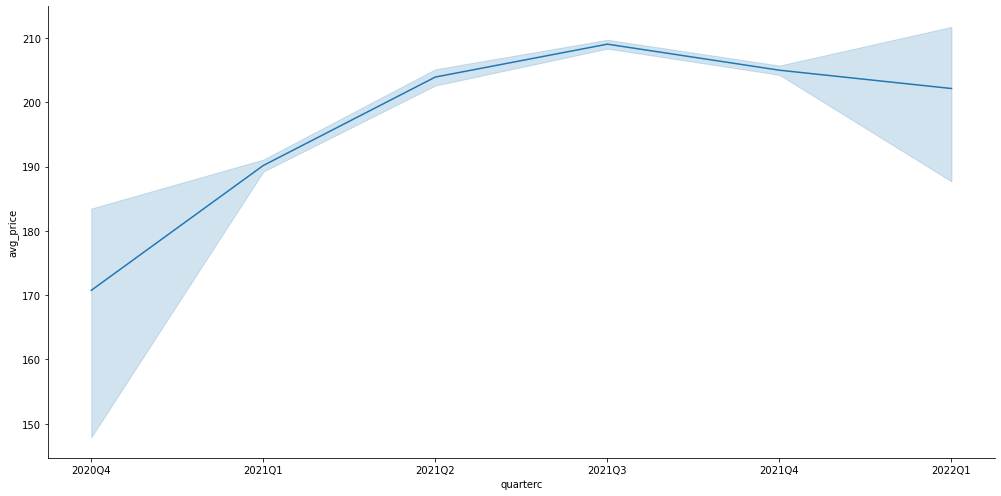

In [57]:
sns.relplot(data=price_avg,x='quarterc',y='avg_price' , kind='line', height=7, aspect=2)

# Conclusions

In the total <b><i>372</i></b> <i>Calendar Days</i> included in the data set, average prices are highest in <b>Q3</b> of the year, which aligns with the expected summer vacation schedules for travelers, with winter seasons being the lowest prices.

In [32]:
price_avg.sort_values(by='calendar_day',ascending=True)

,calendar_day,avg_price
0,2020-12-29,180.875000
1,2020-12-30,147.900990
2,2020-12-31,183.470588
3,2021-01-01,196.646388
4,2021-01-02,193.721649
...,...,...
367,2021-12-31,212.268354
368,2022-01-01,212.377480
369,2022-01-02,206.091810
370,2022-01-03,209.726408


In [33]:
price_avg.describe()

,avg_price
count,372.000000
mean,201.833064
std,8.964060
min,147.900990
25%,195.088284
50%,204.584107
75%,207.562941
max,218.887857


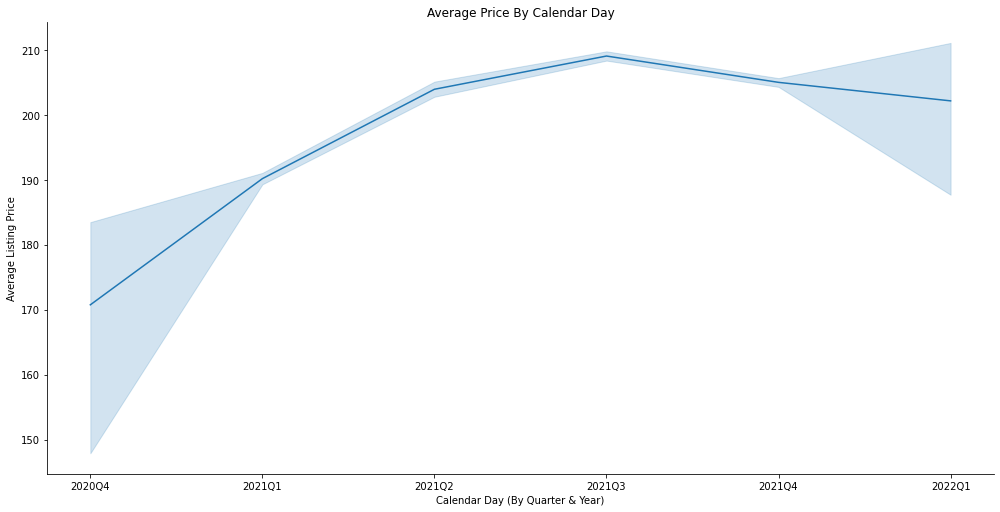

In [59]:
gfg = sns.relplot(data=price_avg,x='quarterc',y='avg_price' , kind='line', height=7, aspect=2)

# add label to the axis and label to the plot
gfg.set(xlabel ="Calendar Day (By Quarter & Year)", 
        ylabel = "Average Listing Price", title ='Average Price By Calendar Day')

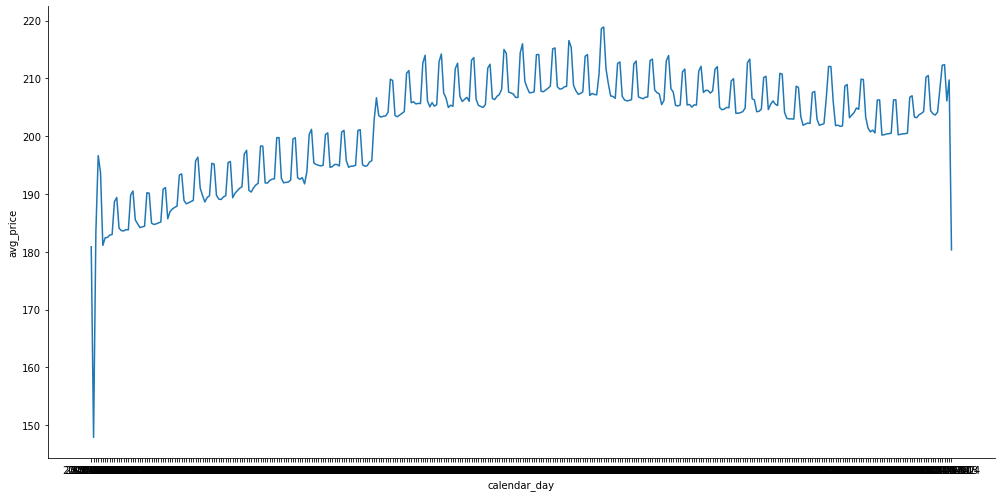

In [34]:
sns.relplot(data=price_avg,x='calendar_day',y='avg_price' , kind='line', height=7, aspect=2)